In [4]:
import numpy as np

import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#데이터 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
d_code=pd.read_csv('속성_D_코드.csv',index_col=0).T.to_dict()
h_code=pd.read_csv('속성_H_코드.csv',index_col=0).T.to_dict()
l_code=pd.read_csv('속성_L_코드.csv',index_col=0).T.to_dict()

In [6]:
train = train.drop(['id', 'contents_open_dt','person_rn', 'contents_rn',
# 'person_prefer_d_1','person_prefer_d_2','person_prefer_d_3',
# 'contents_attribute_d','person_prefer_h_1','person_prefer_h_2','person_prefer_h_3','contents_attribute_h','contents_attribute_l',
'person_prefer_f','person_prefer_g'], axis=1) 


test = test.drop(['id', 'contents_open_dt','person_rn', 'contents_rn',
# 'person_prefer_d_1','person_prefer_d_2','person_prefer_d_3',
# 'contents_attribute_d','person_prefer_h_1','person_prefer_h_2','person_prefer_h_3','contents_attribute_h','contents_attribute_l',
'person_prefer_f','person_prefer_g'], axis=1)

# print(train.head())
train['d_l_match_yn']=train['d_l_match_yn'].replace([True,False],[1,0])
train['d_m_match_yn']=train['d_m_match_yn'].replace([True,False],[1,0])
train['d_s_match_yn']=train['d_s_match_yn'].replace([True,False],[1,0])
train['h_l_match_yn']=train['h_l_match_yn'].replace([True,False],[1,0])
train['h_m_match_yn']=train['h_m_match_yn'].replace([True,False],[1,0])
train['h_s_match_yn']=train['h_s_match_yn'].replace([True,False],[1,0])

test['d_l_match_yn']=test['d_l_match_yn'].replace([True,False],[1,0])
test['d_m_match_yn']=test['d_m_match_yn'].replace([True,False],[1,0])
test['d_s_match_yn']=test['d_s_match_yn'].replace([True,False],[1,0])
test['h_l_match_yn']=test['h_l_match_yn'].replace([True,False],[1,0])
test['h_m_match_yn']=test['h_m_match_yn'].replace([True,False],[1,0])
test['h_s_match_yn']=test['h_s_match_yn'].replace([True,False],[1,0])

In [7]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 랜덤 시드 고정
torch.manual_seed(42)

# GPU 사용 가능일 경우 랜덤 시드 고정
if device == 'cuda':
    torch.cuda.manual_seed_all(42)

In [8]:
x = train.iloc[:, :-1]
y = train.iloc[:, -1]

x= x.to_numpy()
print(x[0])
print(y[0])
# x=np.where(x > 1000, x/1000, x)
# x=np.where(x > 100, x/100, x)
# x=np.where(x > 10, x/10, x)
# x=x/10
x=torch.Tensor(x)

print(x.size())
print(x[0][1])
y=torch.Tensor(y)

print(x)
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)


dataset_train = TensorDataset(x_train, y_train)
dataloader_train = DataLoader(dataset_train, batch_size=64, shuffle=True)


dataset_valid = TensorDataset(x_valid, y_valid)
dataloader_valid = DataLoader(dataset_valid, batch_size=64, shuffle=True)


x_test=test.iloc[:]
x_test=x_test.to_numpy()
# x_test=np.where(x_test > 1000, x_test/1000, x_test)
# x_test=np.where(x_test > 100, x_test/100, x_test)
# x_test=np.where(x_test > 10, x_test/10, x_test)
# x_test=x_test/10
print(x_test.shape)
x_test=torch.FloatTensor(x_test)

[   1    1    1    0    0    0    1    4    3    5  275  370  369    8
    4   95   59    3    3   10    2    1    2 1608  275    1    4  139]
1
torch.Size([501951, 28])
tensor(1.)
tensor([[  1.,   1.,   1.,  ...,   1.,   4., 139.],
        [  0.,   0.,   0.,  ...,   1.,   4., 133.],
        [  0.,   0.,   0.,  ...,   1.,   4.,  53.],
        ...,
        [  1.,   1.,   1.,  ...,   2.,   7.,  65.],
        [  1.,   0.,   0.,  ...,   3.,   4., 259.],
        [  1.,   1.,   1.,  ...,   2.,   5., 289.]])
(46404, 28)


In [9]:
class LogisticRegression(nn.Module):
    
    def __init__(self):
        super(LogisticRegression, self).__init__()

        # self.linear = nn.Sequential(
        self.linear1=nn.Linear(28,16)
        self.batch_normal1=nn.BatchNorm1d(16)
        self.LeakRelu=nn.LeakyReLU()

        self.linear2=nn.Linear(16, 16)
        self.batch_normal2=nn.BatchNorm1d(16)
        self.LeakRelu=nn.LeakyReLU()

        self.linear3=nn.Linear(16, 16)
        self.batch_normal3=nn.BatchNorm1d(16)
        self.LeakRelu=nn.LeakyReLU()

        self.linear4=nn.Linear(16, 16)
        self.batch_normal4=nn.BatchNorm1d(16)
        self.LeakRelu=nn.LeakyReLU()

        self.linear5=nn.Linear(16, 16)
        self.batch_normal5=nn.BatchNorm1d(16)
        self.LeakRelu=nn.LeakyReLU()

        self.linear6=nn.Linear(16, 16)
        self.batch_normal6=nn.BatchNorm1d(16)
        self.LeakRelu=nn.LeakyReLU()

        self.linear7=nn.Linear(16, 1)
        self.batch_normal7=nn.BatchNorm1d(1)
        self.LeakRelu=nn.LeakyReLU()

        self.sigmoid=nn.Sigmoid()    
        torch.nn.init.xavier_uniform_(self.linear1.weight)
        torch.nn.init.xavier_uniform_(self.linear2.weight)
        torch.nn.init.xavier_uniform_(self.linear3.weight)
        torch.nn.init.xavier_uniform_(self.linear4.weight)
        torch.nn.init.xavier_uniform_(self.linear5.weight)
        torch.nn.init.xavier_uniform_(self.linear6.weight)
        torch.nn.init.xavier_uniform_(self.linear7.weight)
        # )        
#  self.linear2,self.batch_normal2, self.LeakRelu, 
        self.model=nn.Sequential(self.linear1, self.batch_normal1, self.LeakRelu,
                                 self.linear2,self.batch_normal2, self.LeakRelu, 
                                 self.linear3,self.batch_normal3,self.LeakRelu,
                                 self.linear4, self.batch_normal4,self.LeakRelu,
                                 self.linear5, self.batch_normal5,self.LeakRelu,
                                 self.linear6, self.batch_normal6,self.LeakRelu,
                                 self.linear7, self.batch_normal7,self.LeakRelu,
                                 self.sigmoid)

    def forward(self, x):
        return self.model(x)

model1=LogisticRegression().to(device)

In [10]:
criterion1=nn.CrossEntropyLoss().to(device)
optimizer1 = optim.Adam(model1.parameters(), lr=0.001)
print(model1.parameters)

<bound method Module.parameters of LogisticRegression(
  (linear1): Linear(in_features=28, out_features=16, bias=True)
  (batch_normal1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (LeakRelu): LeakyReLU(negative_slope=0.01)
  (linear2): Linear(in_features=16, out_features=16, bias=True)
  (batch_normal2): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear3): Linear(in_features=16, out_features=16, bias=True)
  (batch_normal3): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear4): Linear(in_features=16, out_features=16, bias=True)
  (batch_normal4): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear5): Linear(in_features=16, out_features=16, bias=True)
  (batch_normal5): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear6): Linear(in_features=16, out_features=16, bias=True)
  (batch_normal6): Ba

In [11]:
nb_epochs = 50
accuracy_list_train=[]
accuracy_list_valid=[]
f1_list_train=[]
f1_list_valid=[]
accuracy_mean=0
f1_mean=0

# x_valid, y_valid=dataset_valid

x_valid=x_valid.to(device)
y_valid=y_valid.to(device)

for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader_train):

        x_train, y_train = samples

        x_train=x_train.to(device)
        y_train=y_train.to(device)


        # H(x) 계산
        hypothesis = model1(x_train)
        
        
    
        # cost 계산
        # print(y_train.size())
        hypothesis=hypothesis.squeeze()
        # print(hypothesis.size())
        # print(hypothesis)
        # print(y_train)
        cost = F.binary_cross_entropy(hypothesis, y_train)

        # cost로 H(x) 개선
        optimizer1.zero_grad()
        cost.backward()
        optimizer1.step()

        bigo=torch.FloatTensor([0.5]).to(device)

        prediction = hypothesis >= bigo # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        accuracy_mean= accuracy+accuracy_mean
        f1 = f1_score(y_train.cpu(), prediction.float().cpu())
        f1_mean=f1 + f1_mean

        # 20번마다 로그 출력
        if epoch % 10 == 0:
          if batch_idx %1000 == 0:
              prediction = hypothesis >= bigo # 예측값이 0.5를 넘으면 True로 간주
              correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
              accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
              f1 = f1_score(y_train.cpu(), prediction.float().cpu())
              print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f} Accuracy {:2.2f}%  f1 score : {:2.6f}'.format( # 각 에포크마다 정확도를 출력
                  epoch, nb_epochs, batch_idx+1, len(dataloader_train), cost.item(), accuracy * 100, f1
              ))

    accuracy_mean=accuracy_mean/len(dataloader_train)
    accuracy_list_train.append(accuracy_mean)
    f1_mean=f1_mean/len(dataloader_train)
    f1_list_train.append(f1_mean)

    valid_hypothesis = model1(x_valid)
    valid_hypothesis=valid_hypothesis.squeeze()
    valid_prediction = valid_hypothesis >= bigo # 예측값이 0.5를 넘으면 True로 간주
    valid_correct_prediction = valid_prediction.float() == y_valid # 실제값과 일치하는 경우만 True로 간주
    valid_accuracy = valid_correct_prediction.sum().item() / len(valid_correct_prediction) # 정확도를 계산
    # print(valid_hypothesis)
    # print(valid_prediction)
    
    # print(valid_accuracy)
    # print(len(valid_correct_prediction))
    # print(valid_correct_prediction.sum().item())
    valid_f1 = f1_score(y_valid.cpu(), valid_prediction.float().cpu())

    accuracy_list_valid.append(valid_accuracy)
    f1_list_valid.append(valid_f1)
    torch.save(model1.state_dict(), f'{epoch:04d}.pt')

Epoch    0/50 Batch 1/6275 Cost: 0.703325 Accuracy 56.25%  f1 score : 0.588235
Epoch    0/50 Batch 1001/6275 Cost: 0.675878 Accuracy 60.94%  f1 score : 0.626866
Epoch    0/50 Batch 2001/6275 Cost: 0.693582 Accuracy 54.69%  f1 score : 0.508475
Epoch    0/50 Batch 3001/6275 Cost: 0.696525 Accuracy 48.44%  f1 score : 0.492308
Epoch    0/50 Batch 4001/6275 Cost: 0.690222 Accuracy 48.44%  f1 score : 0.476190
Epoch    0/50 Batch 5001/6275 Cost: 0.704762 Accuracy 51.56%  f1 score : 0.392157
Epoch    0/50 Batch 6001/6275 Cost: 0.680728 Accuracy 57.81%  f1 score : 0.526316
Epoch   10/50 Batch 1/6275 Cost: 0.680871 Accuracy 67.19%  f1 score : 0.631579
Epoch   10/50 Batch 1001/6275 Cost: 0.681709 Accuracy 51.56%  f1 score : 0.537313
Epoch   10/50 Batch 2001/6275 Cost: 0.684839 Accuracy 59.38%  f1 score : 0.566667
Epoch   10/50 Batch 3001/6275 Cost: 0.698166 Accuracy 56.25%  f1 score : 0.517241
Epoch   10/50 Batch 4001/6275 Cost: 0.689839 Accuracy 56.25%  f1 score : 0.575758
Epoch   10/50 Batch 50

51
51


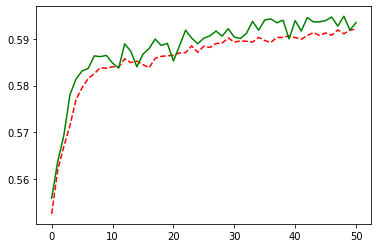

[0.5525655710491368, 0.5620111990285869, 0.5670127043079461, 0.571438302157393, 0.5770142066351379, 0.5795773462215089, 0.5815150056859848, 0.5825694313422076, 0.583844499776575, 0.5837185409561397, 0.5840413960490236, 0.5839526360790517, 0.5857471106458559, 0.5849240234439276, 0.5852509175070562, 0.5844981475565748, 0.5838240568097036, 0.5858325815229976, 0.5862678285654486, 0.5863774596805151, 0.586525219515487, 0.5869950305794712, 0.5870573564457763, 0.5884924593396726, 0.5871322962750608, 0.588445990538583, 0.5881722955097805, 0.5890122253326178, 0.5891119607796015, 0.5902084242168573, 0.5892989043969535, 0.5895768139024271, 0.5894938568627733, 0.5893295010130458, 0.5903296408235346, 0.5896491893185907, 0.5892407143462394, 0.5903271366344244, 0.5903190096366482, 0.5906402234809515, 0.5902817089333569, 0.589928066142194, 0.5907314626400227, 0.5913433104588537, 0.5907366682566468, 0.5912669500666544, 0.5907823068180718, 0.5919243278576602, 0.59108453641347, 0.591900305636613, 0.59205

In [12]:
import matplotlib.pyplot as plt


t=range(0,nb_epochs+1)
print(len(accuracy_list_train))
print(len(accuracy_list_valid))

plt.plot(t,accuracy_list_train,'r--',t,accuracy_list_valid,'g-')


plt.show()

print(accuracy_list_train)
print(accuracy_list_valid)

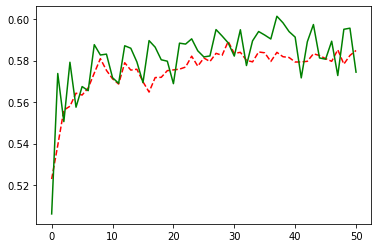

[0.5229656950497057, 0.5391718499944794, 0.5561696721082662, 0.5580170432602397, 0.5643289272966526, 0.5634168068688116, 0.5668309959003676, 0.5740110168892544, 0.5809596463521979, 0.5753088566568361, 0.5712609258038306, 0.5687161227772307, 0.5789800757832663, 0.5754357728202194, 0.5758581622880963, 0.5698252097972278, 0.5648578118326844, 0.571836364170642, 0.5719634779682761, 0.5751842995721569, 0.5755377193102061, 0.5758980367537698, 0.5769069028365134, 0.582152421885983, 0.5773362403619533, 0.581271116149503, 0.5795770055048498, 0.5835157658885287, 0.5825770265249544, 0.5892411652452123, 0.5834648680892702, 0.5840048286736877, 0.5801722121242425, 0.5793992378622187, 0.5841910333775249, 0.5837649978243824, 0.579587085974777, 0.5839899894647809, 0.5818894144305633, 0.5814984504447425, 0.579335019626676, 0.5793642959506747, 0.5796782555050158, 0.5833093685156487, 0.5824674913944138, 0.5809554526771208, 0.5796679176130385, 0.5852306860840746, 0.5783349169665709, 0.5825019950316326, 0.58

In [13]:
plt.plot(t,f1_list_train,'r--',t,f1_list_valid,'g-')

plt.show()

print(f1_list_train)
print(f1_list_valid)

In [18]:
result=pd.read_csv('sample_submission.csv')

model2=LogisticRegression().cuda()
model2.load_state_dict(torch.load('0010.pt'))

x_test=x_test.to(device)
hypothesis=model2(x_test)
print(hypothesis)
prediction = hypothesis >= torch.FloatTensor([0.5]).to(device) # 예측값이 0.5를 넘으면 True로 간주

print(prediction)

prediction = torch.squeeze(prediction)
prediction=prediction.cpu()
prediction=np.array(prediction)
prediction=pd.Series(prediction)

prediction=prediction.replace([True,False],[1,0])

result['target']=prediction
result.to_csv('result.csv',index=False)

tensor([[0.5073],
        [0.4953],
        [0.4996],
        ...,
        [0.6659],
        [0.6143],
        [0.5780]], device='cuda:0', grad_fn=<SigmoidBackward0>)
tensor([[ True],
        [False],
        [False],
        ...,
        [ True],
        [ True],
        [ True]], device='cuda:0')
